In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import applications
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Convolution2D, MaxPool2D, Flatten
from keras.models import Model
from keras.layers import Input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.utils import compute_class_weight
from keras.optimizers import Adam
from keras.layers import Dense
# from keras.layers.core import Activation
from keras.layers import Activation
from keras.layers import BatchNormalization
# from keras.layers.convolutional import UpSampling2D
from tensorflow.keras.layers import UpSampling2D
# from keras.layers.core import Flatten
from tensorflow.keras.layers import Flatten
from keras.layers import Input
# from keras.layers.convolutional import Conv2D, Conv2DTranspose
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from keras.models import Model
from keras.layers import LeakyReLU, PReLU
from keras.layers import add
from keras.applications.vgg19 import VGG19
import torch.optim as optim
import torch.nn.functional as F
import tensorflow as tf
import numpy as np
from PIL import Image
from keras.utils import custom_object_scope
from keras.models import load_model
from keras.utils import CustomObjectScope
import cv2
from google.colab.patches import cv2_imshow

In [7]:
# Define the custom loss function
class VGGLoss(tf.keras.Model):
    def __init__(self, feature_layer=36):
        super(VGGLoss, self).__init__()
        self.vgg = tf.keras.applications.VGG19(include_top=False, input_shape=(None, None, 3))
        self.vgg.trainable = False
        self.feature_layer = feature_layer
        self.loss = tf.keras.losses.MeanSquaredError()

    def call(self, x, y):
        # Use the VGG feature extractor to compute features
        x_features = self.vgg(x)
        y_features = self.vgg(y)

        # Compute the feature difference between the generated and target images
        x_features = tf.stop_gradient(x_features)
        y_features = tf.stop_gradient(y_features)
        loss = self.loss(x_features, y_features)

        return loss

In [26]:
# model_path = '/content/drive/MyDrive/Colab Notebooks/splitdata_midterm/midtermModelsgen_model0.h5'
model_path = '/content/drive/MyDrive/Colab Notebooks/splitdata_midterm/modeldirgen_googlecolab_model0.h5'

image_shape = (128,128,3)
gen_loss_fn = VGGLoss(image_shape)

# Load the saved model with custom_objects
model = tf.keras.models.load_model(model_path, {"call": gen_loss_fn.call})

In [27]:
# Load the input image and resize it to 32x32
image_path = '/content/drive/MyDrive/Colab Notebooks/splitdata_midterm/train/cat/cat.0.jpg'
input_image = cv2.imread(image_path)
input_image = cv2.resize(input_image, (32, 32))

# Preprocess the input image
input_image = np.array(input_image)
#input_image = input_image / 127.5 - 1.
input_image = input_image / 255.
input_image = np.expand_dims(input_image, axis=0)

# Use the generator to generate a new image
generated_image = model.predict(input_image)

# Postprocess the generated image
generated_image = (generated_image + 1.) * 127.5
generated_image = generated_image.astype(np.uint8)

1/1 [==============================] - 1s 1s/step


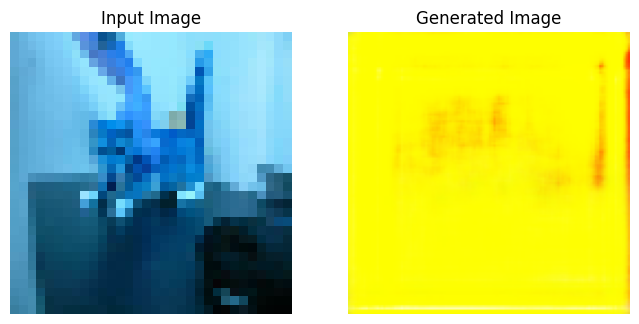

In [28]:
import matplotlib.pyplot as plt

# Define the labels
label_names = ['Input Image', 'Generated Image']

# Display the images with labels
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
for i, ax in enumerate(axes):
    ax.imshow(input_image[i]) if i==0 else ax.imshow(generated_image[i-1])
    ax.set_title(label_names[i])
    ax.axis('off')
plt.show()